In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
np.random.seed(42)
X = np.concatenate([
    np.random.normal(loc=[20, 2], scale=1, size=(50, 2)),
    np.random.normal(loc=[25, 8], scale=1, size=(50, 2)),
    np.random.normal(loc=[20, 8], scale=1, size=(50, 2))
])
df = pd.DataFrame(X, columns=['ålder', 'köpfrekvens'])

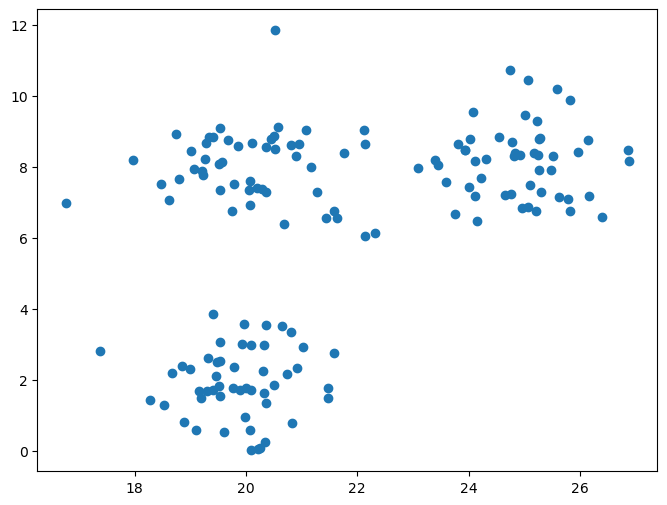

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(df['ålder'], df['köpfrekvens'])
plt.show()

In [7]:
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(df)

df['kluster_etikett'] = kmeans.labels_

print(df.head())


       ålder  köpfrekvens  kluster_etikett
0  20.496714     1.861736                2
1  20.647689     3.523030                2
2  19.765847     1.765863                2
3  21.579213     2.767435                2
4  19.530526     2.542560                2


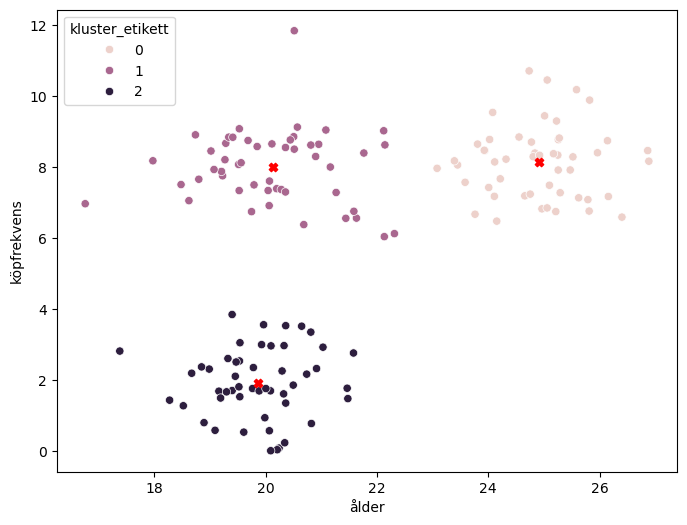

In [11]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='ålder', y='köpfrekvens', hue='kluster_etikett', data=df)

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='X', c='red')


plt.show()


## Klusteranalys av iris-datasetet

In [13]:
iris_df = sns.load_dataset('iris')

X = iris_df.drop('species', axis=1)

print(X.head())


   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


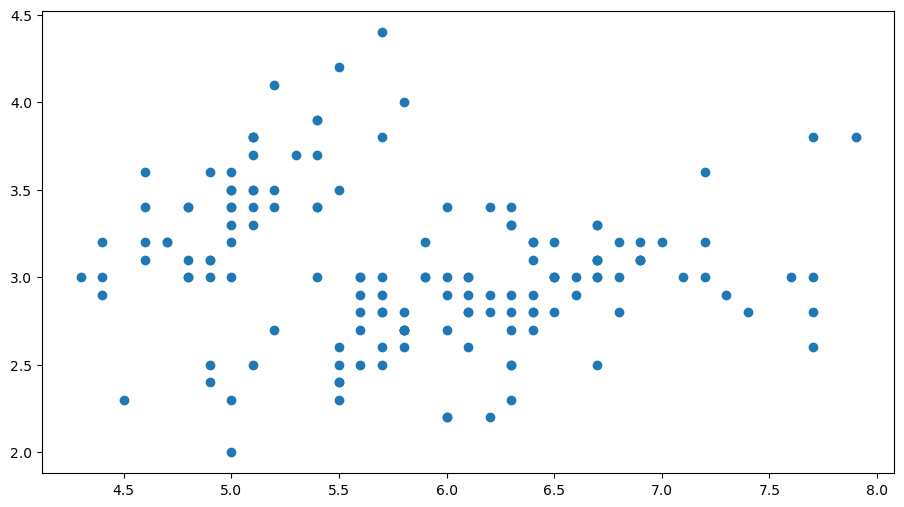

In [15]:
plt.figure(figsize=(11,6))
plt.scatter(X['sepal_length'], X['sepal_width'])
plt.show()

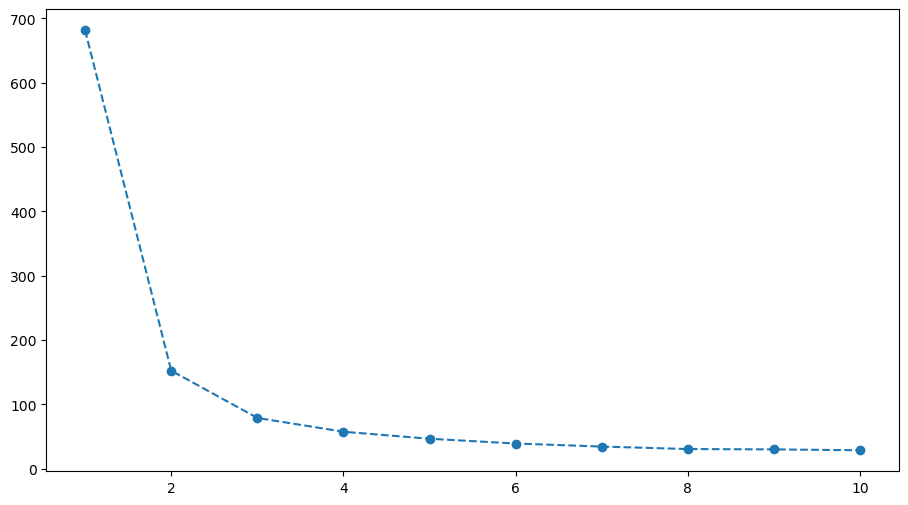

In [16]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(11,6))
plt.plot(range(1,11), inertia, marker='o', linestyle='--')
plt.show()



In [17]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X)

iris_df['cluster_pred'] = kmeans.labels_

print(iris_df.head())


   sepal_length  sepal_width  petal_length  petal_width species  cluster_pred
0           5.1          3.5           1.4          0.2  setosa             1
1           4.9          3.0           1.4          0.2  setosa             1
2           4.7          3.2           1.3          0.2  setosa             1
3           4.6          3.1           1.5          0.2  setosa             1
4           5.0          3.6           1.4          0.2  setosa             1


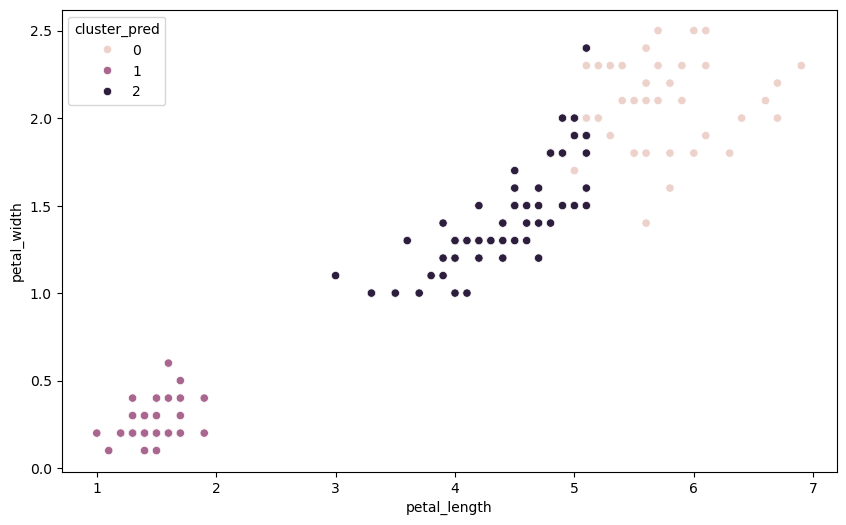

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='petal_length', y='petal_width', hue='cluster_pred', data=iris_df)
plt.show()

## Rast till 14.40

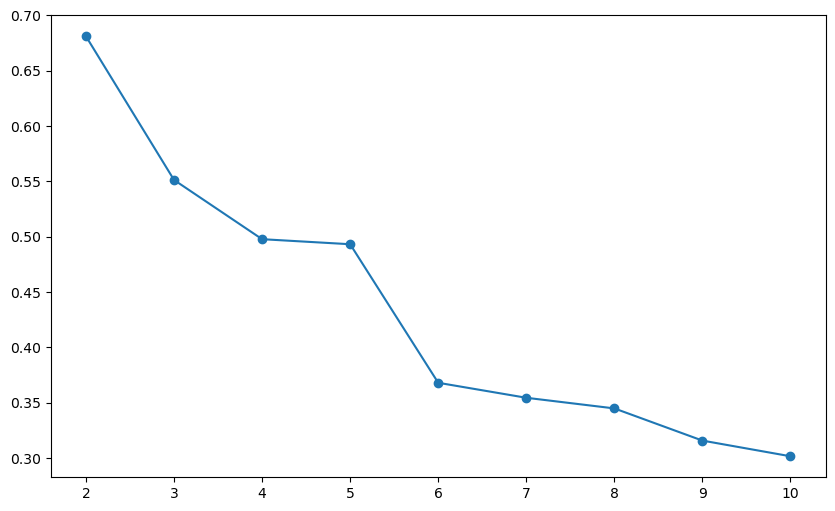

In [20]:
from sklearn.metrics import silhouette_score

silhoutte_scores = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhoutte_scores.append(score)

plt.figure(figsize=(10,6))
plt.plot(range(2,11), silhoutte_scores, marker='o')
plt.show()
